<a href="https://colab.research.google.com/github/chuangchai49097/data_viz_2022/blob/main/Project_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ไฟล์ที่ใช้อยู่ใน drive นี้ : https://drive.google.com/drive/folders/1G8dlp2IRAX6bt-gDi8RzRGzkoKhEE__q

* แหล่งที่มาของข้อมูลรายงาน COVID-19 ประจำวัน ข้อมูลประจำประเทศไทย (ข้อมูลตัวที่ 1-4) : https://data.go.th/dataset/covid-19-daily
* แหล่งที่มาของข้อมูลผู้เสียชีวิตจากอุบัติเหตุทางถนน จากระบบบูรณาการข้อมูลการตายจากอุบัติเหตุทางถนน (3 ฐาน) (ข้อมูลที่ 6) : 
https://data.go.th/dataset/rtddi

ข้อมูลจากองค์กร : กรมควบคุมโรค

# เตรียมข้อมูล (Data Preprocessing)

## import packages ที่ต้องใช้ และนำไฟล์เข้ามาใน colab

In [33]:
import pandas as pd  #import package เข้ามา
import os  # ใช้จัดการไฟล์ต่างๆ

In [34]:
from google.colab import drive  # เชื่อม google drive เพื่อเอาข้อมูลมาใช้
drive.mount('/content/drive')  
path = '/content/drive/My Drive/Project_data'  # ชี้โฟลเดอร์ใน google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ข้อมูลที่ 1 รายงานจำนวนผู้ติดเชื้อ COVID-19 ประจำวัน

คำอธิบายตาราง
* No คือ รหัสผู้ป่วย
* Age คือ อายุของผู้ป่วย
* Sex คือ เพศผู้ป่วย
* Nationality คือ สัญชาติ
* Province of isolation คือ จังหวัดที่รักษาตัว
* Notification Date คือ วันที่กระทรวงได้รับรายงาน
* Announce Date คือ วันที่แถลงข่าว
* Province of onset คือ จังหวัดที่เริ่มพบว่าตัวเองมีอาการป่วย
* District of onset คือ อำเภอที่เริ่มพบว่าตัวเองมีอาการป่วย
* Quarantine คือ สถานะการกัดตัว


In [35]:
covid_jan_20 = pd.read_csv(os.path.join(path,'confirmed-cases.csv'))  # ที่อยู่ของไฟล์ confirmed-cases.xlsx
covid_jan_20.head()  # เรียกดูข้อมูลแค่หัวตาราง

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


In [36]:
covid_jan_20.shape  # ขนาดของ covid_jan_20

(839771, 11)

### ข้อมูลที่ 2 รายงานจำนวนผู้ติดเชื้อ COVID-19 ประจำวันเริ่มตั้งแต่วันที่ 12 สิงหาคม 2564

คำอธิบายตาราง
* No คือ รหัสผู้ป่วย
* Age คือ อายุของผู้ป่วย
* Sex คือ เพศผู้ป่วย
* Nationality คือ สัญชาติ
* Province of isolation คือ จังหวัดที่รักษาตัว
* Notification Date คือ วันที่กระทรวงได้รับรายงาน
* Announce Date คือ วันที่แถลงข่าว
* Province of onset คือ จังหวัดที่เริ่มพบว่าตัวเองมีอาการป่วย
* District of onset คือ อำเภอที่เริ่มพบว่าตัวเองมีอาการป่วย
* Quarantine คือ สถานะการกัดตัว

In [37]:
covid_aug_21 = pd.read_csv(os.path.join(path,'confirmed-cases-since-120864.csv'))  # ที่อยู่ของไฟล์ confirmed-cases-since-120864.xlsx
covid_aug_21.head()  # เรียกดูข้อมูลแค่หัวตาราง

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,816990,12/8/2021,11/8/2021,ชาย,7.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
1,816991,12/8/2021,11/8/2021,ชาย,1.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
2,816992,12/8/2021,11/8/2021,ชาย,35.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
3,816993,12/8/2021,11/8/2021,หญิง,33.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
4,816994,12/8/2021,11/8/2021,หญิง,14.0,ปี,Thailand,เชียงราย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,NaN,NaN


In [38]:
covid_aug_21.shape  # ขนาดของ covid_aug_21

(1042168, 11)

### ข้อมูลที่ 3 รายงานจำนวนผู้ติดเชื้อ COVID-19 ประจำวันเริ่มตั้งแต่วันที่ 27 ตุลาคม 2564

คำอธิบายตาราง
* No คือ รหัสผู้ป่วย
* Age คือ อายุของผู้ป่วย
* Sex คือ เพศผู้ป่วย
* Nationality คือ สัญชาติ
* Province of isolation คือ จังหวัดที่รักษาตัว
* Notification Date คือ วันที่กระทรวงได้รับรายงาน
* Announce Date คือ วันที่แถลงข่าว
* Province of onset คือ จังหวัดที่เริ่มพบว่าตัวเองมีอาการป่วย
* District of onset คือ อำเภอที่เริ่มพบว่าตัวเองมีอาการป่วย
* Quarantine คือ สถานะการกัดตัว

In [39]:
covid_oct_21 = pd.read_csv(os.path.join(path,'confirmed-cases-since-271064.csv'))  # ที่อยู่ของไฟล์ confirmed-cases-since-271064.xlsx
covid_oct_21.head()  # เรียกดูข้อมูลแค่หัวตาราง

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,Unnamed: 11
0,1859158,26/10/2021,25/10/2021,ชาย,20.0,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง,NaN
1,1859159,26/10/2021,25/10/2021,หญิง,42.0,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง,NaN
2,1859160,26/10/2021,25/10/2021,หญิง,33.0,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร,NaN
3,1859161,26/10/2021,25/10/2021,หญิง,52.0,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร,NaN
4,1859162,26/10/2021,25/10/2021,หญิง,84.0,ปี,Thailand,ลำปาง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ลำปาง,เมืองลำปาง,NaN


In [40]:
covid_oct_21.shape  # ขนาดของ covid_oct_21

(1010459, 12)

In [41]:
covid_oct_21_cut = covid_oct_21.iloc[:,:-1]
covid_oct_21_cut

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1859158,26/10/2021,25/10/2021,ชาย,20.0,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
1,1859159,26/10/2021,25/10/2021,หญิง,42.0,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
2,1859160,26/10/2021,25/10/2021,หญิง,33.0,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร
3,1859161,26/10/2021,25/10/2021,หญิง,52.0,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร
4,1859162,26/10/2021,25/10/2021,หญิง,84.0,ปี,Thailand,ลำปาง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ลำปาง,เมืองลำปาง
...,...,...,...,...,...,...,...,...,...,...,...
1010454,2869612,27/2/2022,26/2/2022,ชาย,NaN,NaN,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1010455,2869613,27/2/2022,26/2/2022,ชาย,NaN,NaN,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1010456,2869614,27/2/2022,26/2/2022,ชาย,NaN,NaN,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,NaN,NaN
1010457,2869615,27/2/2022,26/2/2022,ชาย,NaN,NaN,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,NaN,NaN


### ข้อมูลที่ 4 รายงานจำนวนผู้ติดเชื้อ COVID-19 ประจำวันเริ่มตั้งแต่วันที่ 28 กุมภาพันธ์ 2565

คำอธิบายตาราง
* No คือ รหัสผู้ป่วย
* Age คือ อายุของผู้ป่วย
* Sex คือ เพศผู้ป่วย
* Nationality คือ สัญชาติ
* Province of isolation คือ จังหวัดที่รักษาตัว
* Notification Date คือ วันที่กระทรวงได้รับรายงาน
* Announce Date คือ วันที่แถลงข่าว
* Province of onset คือ จังหวัดที่เริ่มพบว่าตัวเองมีอาการป่วย
* District of onset คือ อำเภอที่เริ่มพบว่าตัวเองมีอาการป่วย
* Quarantine คือ สถานะการกัดตัว

In [42]:
covid_feb_22 = pd.read_csv(os.path.join(path,'confirmed-cases-since-280265.csv'))  # ที่อยู่ของไฟล์ confirmed-cases-since-280265.xlsx
covid_feb_22.head()  # เรียกดูข้อมูลแค่หัวตาราง

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,2869617,28/2/2022,27/2/2022,ชาย,41.0,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา
1,2869618,28/2/2022,27/2/2022,หญิง,45.0,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา
2,2869619,28/2/2022,27/2/2022,หญิง,40.0,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา
3,2869620,28/2/2022,27/2/2022,ชาย,44.0,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา
4,2869621,28/2/2022,27/2/2022,ชาย,11.0,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา


In [43]:
covid_feb_22.shape  # ขนาดของ covid_feb_22

(433553, 11)

### ข้อมูลที่ 5 ภูมิภาค โดยแบ่งตามภูมิศาสตร์ , การเมือง , อุตุนิยมวิทยา , การท่องเที่ยว

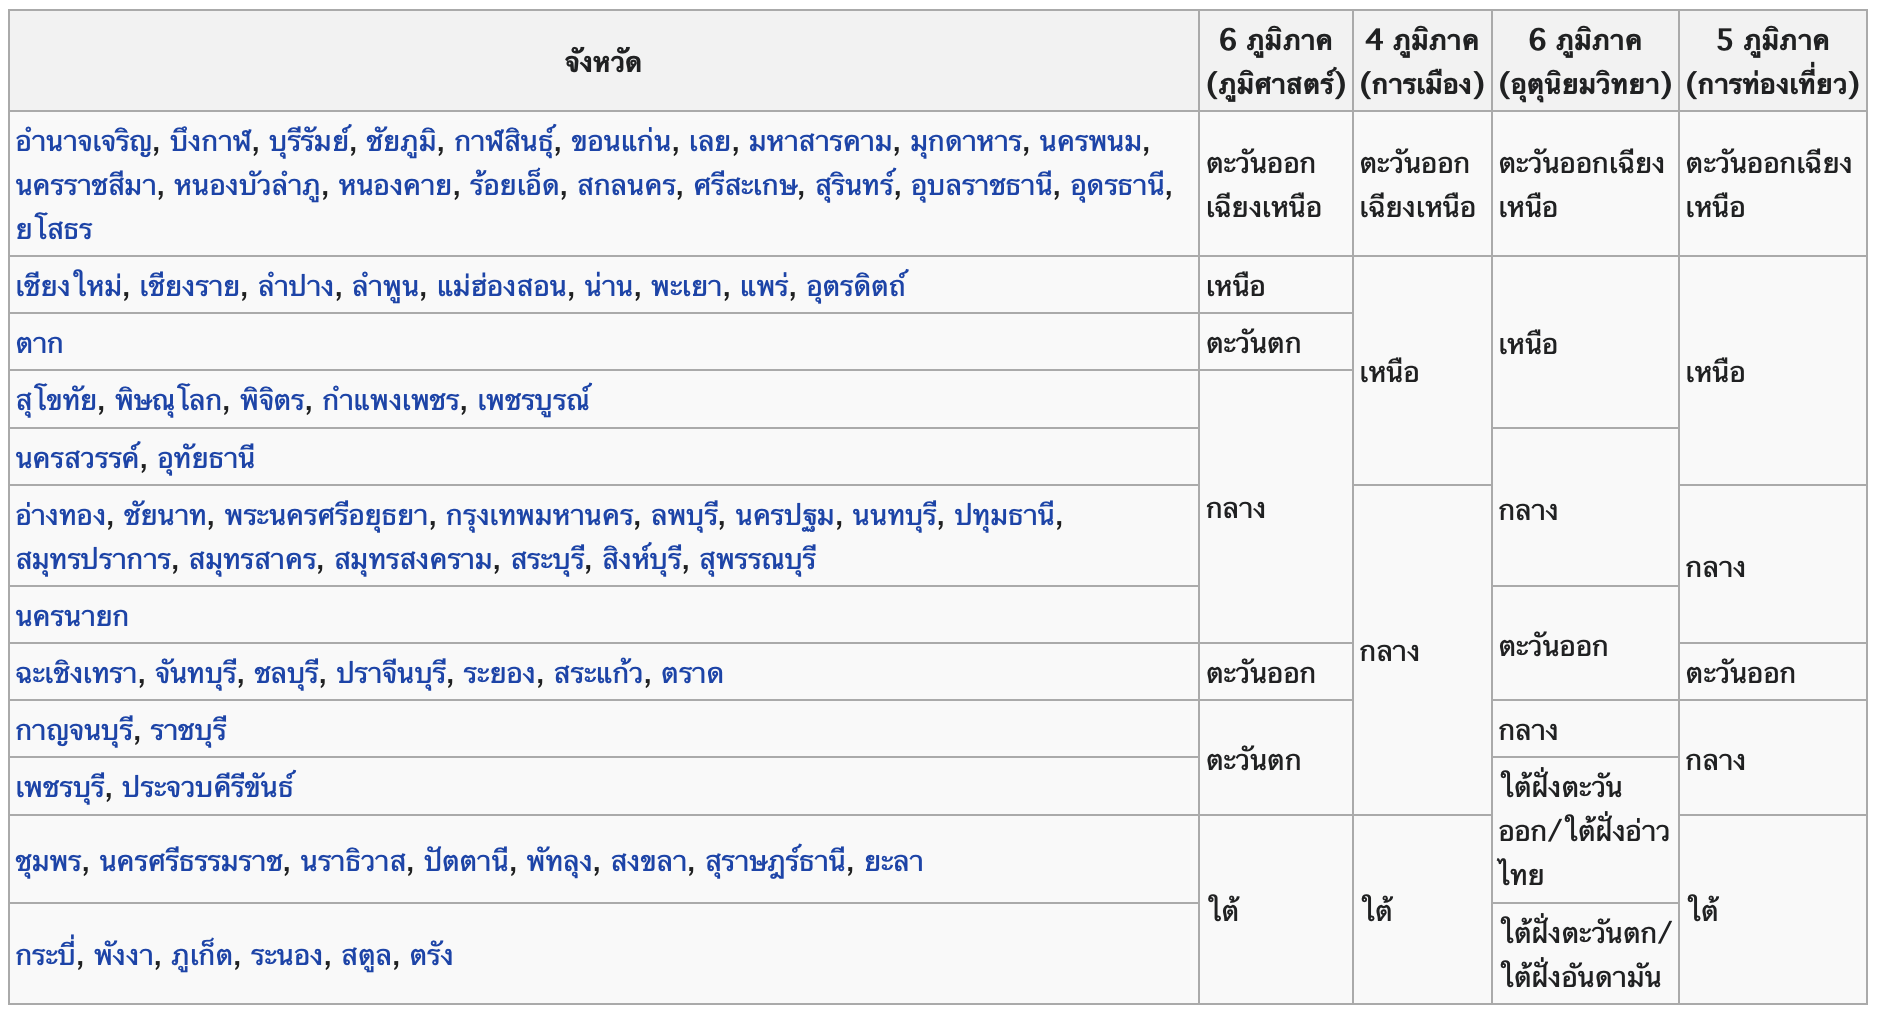

In [44]:
# ข้อมูลในตาราง
region = [['อำนาจเจริญ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['บึงกาฬ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['บุรีรัมย์','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['ชัยภูมิ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['กาฬสินธุ์','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['ขอนแก่น','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['เลย','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['มหาสารคาม','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['มุกดาหาร','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['นครพนม','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['นครราชสีมา','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['หนองบัวลำภู','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['หนองคาย','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['ร้อยเอ็ด','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['สกลนคร','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['ศรีสะเกษ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['สุรินทร์','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['อุบลราชธานี','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['อุดรธานี','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['ยโสธร','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ','ตะวันออกเฉียงเหนือ'],
                ['เชียงใหม่','เหนือ','เหนือ','เหนือ','เหนือ'],
                ['เชียงราย','เหนือ','เหนือ','เหนือ','เหนือ'],
                ['ลำปาง','เหนือ','เหนือ','เหนือ','เหนือ'],
                ['ลำพูน','เหนือ','เหนือ','เหนือ','เหนือ'],
                ['แม่ฮ่องสอน','เหนือ','เหนือ','เหนือ','เหนือ'],
                ['น่าน','เหนือ','เหนือ','เหนือ','เหนือ'],
                ['พะเยา','เหนือ','เหนือ','เหนือ','เหนือ'],
                ['แพร่','เหนือ','เหนือ','เหนือ','เหนือ'],
                ['อุตรดิตถ์','เหนือ','เหนือ','เหนือ','เหนือ'],
                ['ตาก','ตะวันออก','เหนือ','เหนือ','เหนือ'],
                ['สุโขทัย','กลาง','เหนือ','เหนือ','เหนือ'],
                ['พิษณุโลก','กลาง','เหนือ','เหนือ','เหนือ'],
                ['พิจิตร','กลาง','เหนือ','เหนือ','เหนือ'],
                ['กำแพงเพชร','กลาง','เหนือ','เหนือ','เหนือ'],
                ['เพชรบูรณ์','กลาง','เหนือ','เหนือ','เหนือ'],
                ['นครสวรรค์','กลาง','เหนือ','กลาง','เหนือ'],
                ['อุทัยธานี','กลาง','เหนือ','กลาง','เหนือ'],
                ['อ่างทอง','กลาง','กลาง','กลาง','กลาง'],
                ['ชัยนาท','กลาง','กลาง','กลาง','กลาง'],
                ['พระนครศรีอยุธยา','กลาง','กลาง','กลาง','กลาง'],
                ['กรุงเทพมหานคร','กลาง','กลาง','กลาง','กลาง'],
                ['ลพบุรี','กลาง','กลาง','กลาง','กลาง'],
                ['นครปฐม','กลาง','กลาง','กลาง','กลาง'],
                ['นนทบุรี','กลาง','กลาง','กลาง','กลาง'],
                ['ปทุมธานี','กลาง','กลาง','กลาง','กลาง'],
                ['สมุทรปราการ','กลาง','กลาง','กลาง','กลาง'],
                ['สมุทรสาคร','กลาง','กลาง','กลาง','กลาง'],
                ['สมุทรสงคราม','กลาง','กลาง','กลาง','กลาง'],
                ['สระบุรี','กลาง','กลาง','กลาง','กลาง'],
                ['สิงห์บุรี','กลาง','กลาง','กลาง','กลาง'],
                ['สุพรรณบุรี','กลาง','กลาง','กลาง','กลาง'],
                ['นครนายก','กลาง','กลาง','ตะวันออก','กลาง'],
                ['ฉะเชิงเทรา','ตะวันออก','กลาง','ตะวันออก','ตะวันออก'],
                ['จันทบุรี','ตะวันออก','กลาง','ตะวันออก','ตะวันออก'],
                ['ชลบุรี','ตะวันออก','กลาง','ตะวันออก','ตะวันออก'],
                ['ปราจีนบุรี','ตะวันออก','กลาง','ตะวันออก','ตะวันออก'],
                ['ระยอง','ตะวันออก','กลาง','ตะวันออก','ตะวันออก'],
                ['สระแก้ว','ตะวันออก','กลาง','ตะวันออก','ตะวันออก'],
                ['ตราด','ตะวันออก','กลาง','ตะวันออก','ตะวันออก'],
                ['กาญจนบุรี','ตะวันตก','กลาง','กลาง','กลาง'],
                ['ราชบุรี','ตะวันตก','กลาง','กลาง','กลาง'],
                ['เพชรบุรี','ตะวันตก','กลาง','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','กลาง'],
                ['ประจวบคีรีขันธ์','ตะวันตก','กลาง','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','กลาง'],
                ['ชุมพร','ใต้','ใต้','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้'],
                ['นครศรีธรรมราช','ใต้','ใต้','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้'],
                ['นราธิวาส','ใต้','ใต้','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้'],
                ['ปัตตานี','ใต้','ใต้','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้'],
                ['พัทลุง','ใต้','ใต้','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้'],
                ['สงขลา','ใต้','ใต้','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้'],
                ['สุราษฎร์ธานี','ใต้','ใต้','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้'],
                ['ยะลา','ใต้','ใต้','ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','ใต้'],
                ['กระบี่','ใต้','ใต้','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้'],
                ['พังงา','ใต้','ใต้','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้'],
                ['ภูเก็ต','ใต้','ใต้','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้'],
                ['ระนอง','ใต้','ใต้','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้'],
                ['สตูล','ใต้','ใต้','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้'],
                ['ตรัง','ใต้','ใต้','ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','ใต้']]  

# หัวตาราง
header_region = ['จังหวัด','6 ภูมิภาค (ภูมิศาสตร์)','4 ภูมิภาค (การเมือง)','6 ภูมิภาค (อุตุนิยมวิทยา)','5 ภูมิภาค (การท่องเที่ยว)']

In [45]:
# สร้างตารางจากข้อมูลที่คีย์เข้าไป
df_region = pd.DataFrame.from_records(region,columns=header_region) 
df_region

,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว)
0,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,บึงกาฬ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,บุรีรัมย์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
3,ชัยภูมิ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
4,กาฬสินธุ์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
...,...,...,...,...,...
72,พังงา,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
73,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
74,ระนอง,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
75,สตูล,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้


### ข้อมูลที่ 6 ชุดข้อมูลการวิเคราะห์สถิติการฆ่าตัวตาย จำแนกตามเพศ/ตามรายจังหวัดภูมิลำเนา Suicide

ข้อมูลจากองค์กร : กรมสุขภาพจิต (https://datastudio.google.com/reporting/dcb44d06-25c8-4003-84e3-cea766d6677b/page/N6GTC)



In [46]:
data_suicide = pd.read_csv(os.path.join(path,'กรมสุขภาพจิต.csv'))  # ที่อยู่ของไฟล์ tbl_rtddi.xlsx
data_suicide.head()  # เรียกดูข้อมูลแค่หัวตาราง

,จังหวัด,จำนวนประชากร,จำนวนการฆ่าตัวตาย
0,กรุงเทพมหานคร,5522253,175
1,นครราชสีมา,2636473,206
2,อุบลราชธานี,1864600,142
3,ขอนแก่น,1795275,192
4,เชียงใหม่,1629434,238


In [47]:
data_suicide.shape  # ขนาดของ data_dead

(77, 3)

## รวมตารางทั้งหมดเข้าด้วยกัน

### ข้อมูลผู้ติดเชื้อ COVID-19 ทั้งหมด 4 ไฟล์

In [48]:
# เชื่อมตารางข้อมูลผู้ติดเชื้อ COVID-19 ทั้งหมด 4 ไฟล์ ในแนวแกน Y
confirmed_cases = pd.concat([covid_jan_20, covid_aug_21, covid_oct_21_cut, covid_feb_22])
confirmed_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
433548,3303165,18/3/2022,17/3/2022,หญิง,NaN,NaN,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
433549,3303166,18/3/2022,17/3/2022,หญิง,NaN,NaN,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
433550,3303167,18/3/2022,17/3/2022,หญิง,NaN,NaN,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
433551,3303168,18/3/2022,17/3/2022,หญิง,NaN,NaN,NaN,สงขลา,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [49]:
covid_fill = confirmed_cases.fillna("ไม่ระบุ") #ใช้ fill คือการแทนที่ด้วยค่าถัดไปคือการนำค่าถัดไปที่มีค่า ของเซลล์ตัวเองมาแทนที่ลงในช่องที่เป็น NaN
covid_fill.isnull().any()

No.                      False
announce_date            False
Notified date            False
sex                      False
age                      False
Unit                     False
nationality              False
province_of_isolation    False
risk                     False
province_of_onset        False
district_of_onset        False
dtype: bool

In [50]:
set(covid_fill['province_of_onset'])

{'\tประจวบคีรีขันธ์',
 'USA',
 '\xa0กาญจนบุรี',
 '\xa0ชลบุรี',
 '\xa0ตราด',
 '\xa0นครปฐม',
 '\xa0สมุทรสงคราม',
 '\xa0สมุทรสาคร',
 '\xa0อุทัยธานี',
 'กทม',
 'กทม.',
 'กบินทร์บุรี',
 'กระบี่',
 'กระบี่ี่',
 'กรุงเทพ',
 'กรุงเทพมหานคร',
 'กรุงเทพมหานคร.',
 'กรุงเทพมหานคร. / พระนครศรีอยุธยา',
 'กรุงเทพมหานคร. / ศรีสะเกษ',
 'กรุงเทพฯ',
 'กะทู้',
 'กัมพูชา',
 'กาญจนบุรี',
 'กาญจบุรี',
 'กาญนบุรี',
 'กาฬสิน',
 'กาฬสินธิ์',
 'กาฬสินธุ์',
 'กาฬสินธุ์\xa0',
 'กาฬสินธ์',
 'กำเพงเพชร',
 'กำแพง',
 'กำแพงเพชร',
 'กำแพงเพชร\xa0',
 'กําแพงเพชร',
 'ขอนแก่น',
 'ขอนแก่น\xa0',
 'ขอนแก่่น',
 'ขัยนาท',
 'ขัยภูมิ',
 'ขานุวรลักษณ์บุรี',
 'คนไทยเดินทางกลับจากต่างประเทศ',
 'คลองเตย',
 'จ.กรุงเทพมหานคร',
 'จ.ภูเก็ต',
 'จ.ราชบุรี',
 'จ.สุราษฎร์ธานี',
 'จังหวัดสมุทรสาคร',
 'จันทบุรี',
 'ฉะเชองเทราร',
 'ฉะเชิงเทรา',
 'ชมพร',
 'ชลบุรี',
 'ชลบุรี\t',
 'ชลบุรี\xa0',
 'ชลบุุรี',
 'ชอนแก่น',
 'ชัยนาถ',
 'ชัยนาท',
 'ชัยบาดาล',
 'ชัยภูมิ',
 'ชัยภูมิ\xa0',
 'ชุมพร',
 'ชุุมพร',
 'ชุุุมพร',
 'ดอนมดแดง',
 'ดินแดง',
 'ตรัง',
 

In [51]:
# แทนที่รายชื่อจังหวัดให้ถูกต้อง
covid_fill['province_of_onset'].replace({'\tประจวบคีรีขันธ์':'ประจวบคีรีขันธ์',
 'USA':'กรุงเทพมหานคร',
 '\xa0กาญจนบุรี':'กาญจนบุรี',
 '\xa0ชลบุรี':'ชลบุรี',
 '\xa0ตราด':'ตราด',
 '\xa0นครปฐม':'นครปฐม',
 '\xa0สมุทรสงคราม':'สมุทรสงคราม',
 '\xa0สมุทรสาคร':'สมุทรสาคร',
 '\xa0อุทัยธานี':'อุทัยธานี',
 'กทม':'กรุงเทพมหานคร',
 'กทม.':'กรุงเทพมหานคร',
 'กบินทร์บุรี':'ปราจีนบุรี',
 'กระบี่':'กระบี่',
 'กระบี่ี่':'กระบี่',
 'กรุงเทพ':'กรุงเทพมหานคร',
 'กรุงเทพมหานคร':'กรุงเทพมหานคร',
 'กรุงเทพมหานคร.':'กรุงเทพมหานคร',
 'กรุงเทพมหานคร. / พระนครศรีอยุธยา':'กรุงเทพมหานคร',
 'กรุงเทพมหานคร. / ศรีสะเกษ':'กรุงเทพมหานคร',
 'กรุงเทพฯ':'กรุงเทพมหานคร',
 'กะทู้':'ไม่ระบุ',
 'กัมพูชา':'กรุงเทพมหานคร',
 'กาญจนบุรี':'กาญจนบุรี',
 'กาญจบุรี':'กาญจนบุรี',
 'กาญนบุรี':'กาญจนบุรี',
 'กาฬสิน':'กาฬสินธุ์',
 'กาฬสินธิ์':'กาฬสินธุ์',
 'กาฬสินธุ์':'กาฬสินธุ์',
 'กาฬสินธุ์\xa0':'กาฬสินธุ์',
 'กาฬสินธ์':'กาฬสินธุ์',
 'กำเพงเพชร':'กำแพงเพชร',
 'กำแพง':'กำแพงเพชร',
 'กำแพงเพชร':'กำแพงเพชร',
 'กำแพงเพชร\xa0':'กำแพงเพชร',
 'กําแพงเพชร':'กำแพงเพชร',
 'ขอนแก่น':'ขอนแก่น',
 'ขอนแก่น\xa0':'ขอนแก่น',
 'ขอนแก่่น':'ขอนแก่น',
 'ขัยนาท':'ชัยนาท',
 'ขัยภูมิ':'ชัยภูมิ',
 'ขานุวรลักษณ์บุรี':'กำแพงเพชร',
 'คนไทยเดินทางกลับจากต่างประเทศ':'กรุงเทพมหานคร',
 'คลองเตย':'กรุงเทพมหานคร',
 'จ.กรุงเทพมหานคร':'กรุงเทพมหานคร',
 'จ.ภูเก็ต':'ภูเก็ต',
 'จ.ราชบุรี':'ราชบุรี',
 'จ.สุราษฎร์ธานี':'สุราษฎร์ธานี',
 'จังหวัดสมุทรสาคร':'สมุทรสาคร',
 'จันทบุรี':'จันทบุรี',
 'ฉะเชองเทราร':'ฉะเชิงเทรา',
 'ฉะเชิงเทรา':'ฉะเชิงเทรา',
 'ชมพร':'ชุมพร',
 'ชลบุรี':'ชลบุรี',
 'ชลบุรี\t':'ชลบุรี',
 'ชลบุรี\xa0':'ชลบุรี',
 'ชลบุุรี':'ชลบุรี',
 'ชอนแก่น':'ขอนแก่น',
 'ชัยนาถ':'ชัยนาท',
 'ชัยนาท':'ชัยนาท',
 'ชัยบาดาล':'ลพบุรี',
 'ชัยภูมิ':'ชัยภูมิ',
 'ชัยภูมิ\xa0':'ชัยภูมิ',
 'ชุมพร':'ชุมพร',
 'ชุุมพร':'ชุมพร',
 'ชุุุมพร':'ชุมพร',
 'ดอนมดแดง':'อุบลราชธานี',
 'ดินแดง':'กรุงเทพมหานคร',
 'ตรัง':'ตรัง',
 'ตรััง':'ตรัง',
 'ตราด':'ตราด',
 'ตราด\xa0':'ตราด',
 'ตาก':'ตาก',
 'ตากใบ':'นราธิวาส',
 'ต่างจังหวัด':'กรุงเทพมหานคร',
 'ทุ่งเสลี่ยม':'สุโขทัย',
 'ท้ายบ้าน':'สมุทรปราการ',
 'ธารโต':'ยะลา',
 'นคนปฐม':'นครปฐม',
 'นคปฐม':'นครปฐม',
 'นครนปฐม':'นครปฐม',
 'นครนาชสีมา':'นครราชสีมา',
 'นครนายก':'นครนายก',
 'นครปฐม':'นครปฐม',
 'นครปฐม\xa0':'นครปฐม',
 'นครปบม':'นครปฐม',
 'นครพนม':'นครพนม',
 'นครพนม\xa0':'นครพนม',
 'นครยายก':'นครนายก',
 'นครราขสีมา':'นครราชสีมา',
 'นครราชธานี':'นครราชสีมา',
 'นครราชศรีมา':'นครราชสีมา',
 'นครราชสสีมา':'นครราชสีมา',
 'นครราชสีมา':'นครราชสีมา',
 'นครราชสีมา ลพบุรี':'นครราชสีมา',
 'นครราชสีมา\xa0':'นครราชสีมา',
 'นครศรธรรมราช':'นครศรีธรรมราช',
 'นครศรี':'นครศรีธรรมราช',
 'นครศรีธรมมราช':'นครศรีธรรมราช',
 'นครศรีธรมราช':'นครศรีธรรมราช',
 'นครศรีธรรมราข':'นครศรีธรรมราช',
 'นครศรีธรรมราช':'นครศรีธรรมราช',
 'นครศรีฯ':'นครศรีธรรมราช',
 'นครศรีีธรรมราช':'นครศรีธรรมราช',
 'นครศร๊ธรรมราช':'นครศรีธรรมราช',
 'นครศร๊ะรรมราช':'นครศรีธรรมราช',
 'นครสรรค์':'นครสวรรค์',
 'นครสรีธรรมราช':'นครศรีธรรมราช',
 'นครสวรรค':'นครสวรรค์',
 'นครสวรรค์':'นครสวรรค์',
 'นครสวรรค์\xa0':'นครสวรรค์',
 'นครสีธรรมราช':'นครศรีธรรมราช',
 'นครฯ':'นครราชสีมา',
 'นคราชสีมา':'นครราชสีมา',
 'นครีศรีธรรมราช':'นครศรีธรรมราช',
 'นตรนายก':'นครนายก',
 'นตรปฐม':'นครปฐม',
 'นนทบุรี':'นนทบุรี',
 'นนทบุรี\xa0':'นนทบุรี',
 'นนทบุุรี':'นนทบุรี',
 'นนทุบรี':'นนทบุรี',
 'นนทุรี':'นนทบุรี',
 'นนมบุรี':'นนทบุรี',
 'นรศรีธรรมราช':'นครศรีธรรมราช',
 'นราธิวาส':'นราธิวาส',
 'นราธิวาส\u200b':'นราธิวาส',
 'นราธฺวาส':'นราธิวาส',
 'นอกเขต':'ไม่ระบุ',
 'นาราธิวาส':'นราธิวาส',
 'นาวัง':'หนองบัวลำภู',
 'น่าน':'น่าน',
 'น่าน/ฉะเชิงเทรา':'น่าน',
 'บางกรวย':'นนทบุรี',
 'บางกะปิ':'กรุงเทพมหานคร',
 'บางนา':'กรุงเทพมหานคร',
 'บางปะอิน':'กรุงเทพมหานคร',
 'บางละมุง':'ชลบุรี',
 'บางศรีเมือง':'นนทบุรี',
 'บางเพียง':'สมุทรปราการ',
 'บึงกาฬ':'บึงกาฬ',
 'บึงโขงหลง':'บึงกาฬ',
 'บุรีรัมภ์':'บุรีรัมย์',
 'บุรีรัมย์':'บุรีรัมย์',
 'บุรีรัมย์\xa0':'บุรีรัมย์',
 'บุรีรัยม์':'บุรีรัมย์',
 'บุรีรีมย์':'บุรีรัมย์',
 'บ้านหลวง':'น่าน',
 'ปจ':'ไม่ระบุ',
 'ปทึมธานี':'ปทุมธานี',
 'ปทุทธานี':'ปทุมธานี',
 'ปทุมฑานี':'ปทุมธานี',
 'ปทุมทานี':'ปทุมธานี',
 'ปทุมธาน':'ปทุมธานี',
 'ปทุมธานี':'ปทุมธานี',
 'ปทุมธานี.':'ปทุมธานี',
 'ปทุมธานี\xa0':'ปทุมธานี',
 'ปทุมธานีี':'ปทุมธานี',
 'ปทุมาธานี':'ปทุมธานี',
 'ปทุุมธานี':'ปทุมธานี',
 'ปธุมธานี':'ปทุมธานี',
 'ปมุมธานี':'ปทุมธานี',
 'ประจวนคีรีขันธ็':'ประจวบคีรีขันธ์',
 'ประจวบ':'ประจวบคีรีขันธ์',
 'ประจวบคิรีขันธ์':'ประจวบคีรีขันธ์',
 'ประจวบคีรขันธ์':'ประจวบคีรีขันธ์',
 'ประจวบคีรขัันธ์':'ประจวบคีรีขันธ์',
 'ประจวบคีรีขัน':'ประจวบคีรีขันธ์',
 'ประจวบคีรีขันธื':'ประจวบคีรีขันธ์',
 'ประจวบคีรีขันธฺ':'ประจวบคีรีขันธ์',
 'ประจวบคีรีขันธ์':'ประจวบคีรีขันธ์',
 'ประจวบคีรีขันธ์\xa0':'ประจวบคีรีขันธ์',
 'ประจวบคีรีขันธ์์':'ประจวบคีรีขันธ์',
 'ประจวบคีรีขัันธ์':'ประจวบคีรีขันธ์',
 'ประจวบคีีรีขันธ์':'ประจวบคีรีขันธ์',
 'ประจวบฯ':'ประจวบคีรีขันธ์',
 'ประทุมธานี':'ปทุมธานี',
 'ประเทศกัมพูชา':'กรุงเทพมหานคร',
 'ปราจีนบุรี':'ปราจีนบุรี',
 'ปราจีบุรี':'ปราจีนบุรี',
 'ปลวกแดง':'ระยอง',
 'ปลายพระยา':'กระบี่',
 'ปอยเปต':'กรุงเทพมหานคร',
 'ปัตตนรี':'ปัตตานี',
 'ปัตตานนี':'ปัตตานี',
 'ปัตตานี':'ปัตตานี',
 'ปัตตานีี':'ปัตตานี',
 'ปัตาตานี':'ปัตตานี',
 'ปัว':'เพชรบุรี',
 'ปััตตานี':'ปัตตานี',
 'ปุทมธานี':'ปทุมธานี',
 'ป่าโมก':'สุโขทัย',
 'พม่า':'กรุงเทพมหานคร',
 'พรหมพิราม':'พิษณุโลก',
 'พระนครศรียุธยา':'พระนครศรีอยุธยา',
 'พระนครศรีอยุทธยา':'พระนครศรีอยุธยา',
 'พระนครศรีอยุทยา':'พระนครศรีอยุธยา',
 'พระนครศรีอยุธยา':'พระนครศรีอยุธยา',
 'พระนครศรีอยุธยา\xa0':'พระนครศรีอยุธยา',
 'พะเยา':'พะเยา',
 'พังงา':'พังงา',
 'พัทยา':'ชลบุรี',
 'พัทลุง':'พัทลุง',
 'พัทลุุง':'พัทลุง',
 'พัังงา':'พังงา',
 'พิจิตร':'พิจิตร',
 'พิษณุโลก':'พิษณุโลก',
 'พิษณุโลก\xa0':'พิษณุโลก',
 'พิษณูโลก':'พิษณุโลก',
 'ฟินแลนด์':'กรุงเทพมหานคร',
 'ภาษีเจริญ':'กรุงเทพมหานคร',
 'ภุเก็ต':'ภูเก็ต',
 'ภูุเก็ต':'ภูเก็ต',
 'ภููเก็ต':'ภูเก็ต',
 'ภูเก็ต':'ภูเก็ต',
 'ภูเก็็ต':'ภูเก็ต',
 'ภูเพียง':'น่าน',
 'มหาสาคาม':'มหาสารคาม',
 'มหาสารคาม':'มหาสารคาม',
 'มาเลเซีย':'กรุงเทพมหานคร',
 'มุกดาหาร':'มุกดาหาร',
 'มุกาดหาร':'มุกดาหาร',
 'ยะลา':'ยะลา',
 'ยานนาวา':'กรุงเทพมหานคร',
 'ยโสธร':'ยโสธร',
 'ร.จ.จ.นราธิวาส':'นราธิวาส',
 'รอ':'ไม่ระบุ',
 'ระนอง':'ระนอง',
 'ระบุ':'ไม่ระบุ',
 'ระยอง':'ระยอง',
 'ระยอง\xa0':'ระยอง',
 'ระอยง':'ระยอง',
 'ราชบบุรี':'ราชบุรี',
 'ราชบุรี':'ราชบุรี',
 'ราชบุรีี':'ราชบุรี',
 'ราชบุรี\u200b':'ราชบุรี',
 'ราชุรี':'ราชบุรี',
 'ราชเทวี':'กรุงเทพมหานคร',
 'ร้องกวาง':'แพร่',
 'ร้อยเอ็ด':'ร้อยเอ็ด',
 'ลบุรี':'ลพบุรี',
 'ลพบุรี':'ลพบุรี',
 'ลพบุรี.':'ลพบุรี',
 'ลพบุรี\xa0':'ลพบุรี',
 'ลอง':'ไม่ระบุ',
 'ลาดกระบัง':'กรุงเทพมหานคร',
 'ลาดพร้าว':'กรุงเทพมหานคร',
 'ลาว':'กรุงเทพมหานคร',
 'ลำปาง':'ลำปาง',
 'ลำพูน':'ลำพูน',
 'ลำพูน\u200b':'ลำพูน',
 'ลำพููน':'ลำพูน',
 'ลำลูกกา':'กรุงเทพมหานคร',
 'วังชิ้น':'แพร่',
 'วังทอง':'พิษณุโลก',
 'วิเศษชัยชาญ':'อ่างทอง',
 'ศรีษะสะเกษ':'ศรีสะเกษ',
 'ศรีษะเกษ':'ศรีสะเกษ',
 'ศรีสระเกษ':'ศรีสะเกษ',
 'ศรีสะเกษ':'ศรีสะเกษ',
 'ศีรสะเกษ':'ศรีสะเกษ',
 'สกลนคร':'สกลนคร',
 'สครสวรรค์':'นครสวรรค์',
 'สงขลา':'สงขลา',
 'สงขลา\u200b':'สงขลา',
 'สตูล':'สตูล',
 'สถานที่ทำงาน':'ไม่ระบุ',
 'สพรรณบุรี':'สุพรรณบุรี',
 'สมถทรปราการ':'สมุทรปราการ',
 'สมทรสงคราม':'สมุทรสงคราม',
 'สมทรสาคร':'สมุทรสาคร',
 'สมุครปราการ':'สมุทรปราการ',
 'สมุครสาคร':'สมุทรสาคร',
 'สมุท':'สมุทรปราการ',
 'สมุทปราการ':'สมุทรปราการ',
 'สมุทรปรากร':'สมุทรปราการ',
 'สมุทรปรากรร':'สมุทรปราการ',
 'สมุทรปรากา':'สมุทรปราการ',
 'สมุทรปราการ':'สมุทรปราการ',
 'สมุทรปราการ\xa0':'สมุทรปราการ',
 'สมุทรศาคร':'สมุทรสาคร',
 'สมุทรสงคราม':'สมุทรสาคร',
 'สมุทรสาคร':'สมุทรสาคร',
 'สมุทรสาคร\xa0':'สมุทรสาคร',
 'สมุทรสาคา':'สมุทรสาคร',
 'สมุทรสาคาร':'สมุทรสาคร',
 'สมุทรสาทร':'สมุทรสาคร',
 'สมุทรสารคร':'สมุทรสาคร',
 'สมุทราปราการ':'สมุทรปราการ',
 'สมุทราสาคร':'สมุทรสาคร',
 'สมุทสงคราม':'สมุทรสงคราม',
 'สมุทสาคร':'สมุทรสาคร',
 'สมุย':'สุราษฎร์ธานี',
 'สมุุทรปราการ':'สมุทรปราการ',
 'สมุุทรสงคราม':'สมุทรสงคราม',
 'สมุุทรสาคร':'สมุทรสาคร',
 'สระก้ว':'สระแก้ว',
 'สระบุรี':'สระบุรี',
 'สระบุรี\xa0':'สระบุรี',
 'สระแก้ว':'สระแก้ว',
 'สรินทร์':'สุรินทร์',
 'สวิสเซอร์แลนด์':'กรุงเทพมหานคร',
 'สอง':'ไม่ระบุ',
 'สองแคว':'เชียงใหม่',
 'สะพานสูง':'กรุงเทพมหานคร',
 'สะแก้ว':'สระแก้ว',
 'สัตหีบ':'ชลบุรี',
 'สัมผัสผู้ป่วยยืนยัน COVID20':'ไม่ระบุ',
 'สามุทรสาคร':'สมุทรสาคร',
 'สารคาม':'มหาสารคาม',
 'สารภี':'เชียงใหม่',
 'สิงห์บุรี':'สิงห์บุรี',
 'สิงห์บุรี\xa0':'สิงห์บุรี',
 'สุทรปราการ':'สมุทรปราการ',
 'สุพรรญบุรี':'สุพรรณบุรี',
 'สุพรรณบุรั':'สุพรรณบุรี',
 'สุพรรณบุรี':'สุพรรณบุรี',
 'สุพรรณบุรี\xa0':'สุพรรณบุรี',
 'สุมทรปราการ':'สมุทรปราการ',
 'สุมทรสาคร':'สมุทรสาคร',
 'สุมุทรปราการ':'สมุทรปราการ',
 'สุมุทรสาคร':'สมุทรสาคร',
 'สุระบุรี':'สระบุรี',
 'สุราษ':'สุราษฎร์ธานี',
 'สุราษฎณ์ธานี':'สุราษฎร์ธานี',
 'สุราษฎธานี':'สุราษฎร์ธานี',
 'สุราษฎร์':'สุราษฎร์ธานี',
 'สุราษฎร์ธานี':'สุราษฎร์ธานี',
 'สุราษฎร์ฯ':'สุราษฎร์ธานี',
 'สุราษฎร์์ธานี':'สุราษฎร์ธานี',
 'สุราษฎ์ธานี':'สุราษฎร์ธานี',
 'สุราษฏร์ธานี':'สุราษฎร์ธานี',
 'สุราษธานี':'สุราษฎร์ธานี',
 'สุราษร์ฎธานี':'สุราษฎร์ธานี',
 'สุราษร์ธานี':'สุราษฎร์ธานี',
 'สุราษฯ':'สุราษฎร์ธานี',
 'สุรินทรื':'สุรินทร์',
 'สุรินทร์':'สุรินทร์',
 'สุรินทร์ 32150':'สุรินทร์',
 'สุรินทร์,รีสะเกษ':'สุรินทร์',
 'สุรินทร์\xa0':'สุรินทร์',
 'สุริมทร์':'สุรินทร์',
 'สุริะแก้ว':'สระแก้ว',
 'สุวรรณภูมิ':'กรุงเทพมหานคร',
 'สุุพรรณบุรี':'สุพรรณบุรี',
 'สุุราษฎร์ธานี':'สุราษฎร์ธานี',
 'สุุราษฏร์ธานี':'สุราษฎร์ธานี',
 'สุุราษฯ':'สุราษฎร์ธานี',
 'สุุรินทร์':'สุรินทร์',
 'สุุุโขทัย':'สุโขทัย',
 'สุโขทับ':'สุโขทัย',
 'สุโขทัย':'สุโขทัย',
 'สุโขทัย\xa0':'สุโขทัย',
 'สูงเม่น':'แพร่',
 'หนวงบัวลำภู':'หนองบัวลำภู',
 'หนองคาย':'หนองคาย',
 'หนองงคาย':'หนองคาย',
 'หนองบัวภู':'หนองบัวลำภู',
 'หนองบัวลำพูน':'หนองบัวลำภู',
 'หนองบัวลำภู':'หนองบัวลำภู',
 'หนองบัวลําภู':'หนองบัวลำภู',
 'หนองบััวลำภู':'หนองบัวลำภู',
 'หนองม่วงไข่':'แพร่',
 'หนอบัวลำภู':'หนองบัวลำภู',
 'หลายจังหวัด':'ไม่ระบุ',
 'หัวหิน':'ชลบุรี',
 'ห้วยขวาง':'กรุงเทพมหานคร',
 'อยุทธยา':'พระนครศรีอยุธยา',
 'อยุธยา':'พระนครศรีอยุธยา',
 'อยุุธยา':'พระนครศรีอยุธยา',
 'อำนาจเจริญ':'อำนาจเจริญ',
 'อำนาจเจิญ':'อำนาจเจริญ',
 'อำนาญเจริญ':'อำนาจเจริญ',
 'อำนาเจริญ':'อำนาจเจริญ',
 'อิสราเอล':'กรุงเทพมหานคร',
 'อุดธานี':'อุดรธานี',
 'อุดร':'อุดรธานี',
 'อุดรธาณี':'อุดรธานี',
 'อุดรธานี':'อุดรธานี',
 'อุดรธานี\xa0':'อุดรธานี',
 'อุดรธานีี':'อุดรธานี',
 'อุดรราชธานี':'อุดรธานี',
 'อุตรดิตถ์':'อุตรดิตถ์',
 'อุตรดิตถ์\xa0':'อุตรดิตถ์',
 'อุตรดิตถ์์':'อุตรดิตถ์',
 'อุตรดิษถ์':'อุตรดิตถ์',
 'อุตรดิิตถ์':'อุตรดิตถ์',
 'อุตรติดถ์':'อุตรดิตถ์',
 'อุทัยธานี':'อุทัยธานี',
 'อุทัยานี':'อุทัยธานี',
 'อุบลราขธานี':'อุบลราชธานี',
 'อุบลราชธานี':'อุบลราชธานี',
 'อุบลราชธานี\xa0':'อุบลราชธานี',
 'อุุครดิตถ์':'อุตรดิตถ์',
 'อุุดรธาน':'อุดรธานี',
 'อุุดรธานี':'อุดรธานี',
 'อุุตรดิตถ์':'อุตรดิตถ์',
 'อุุทัยธานี':'อุทัยธานี',
 'อุุบลราชธานี':'อุบลราชธานี',
 'อ่งทอง':'อ่างทอง',
 'อ่างทอง':'อ่างทอง',
 'อ่างทอง\xa0':'อ่างทอง',
 'อํานาจเจริญ':'อำนาจเจริญ',
 'เชิงเทรา':'ฉะเชิงเทรา',
 'เชียงราย':'เชียงราย',
 'เชียงใหม่':'เชียงใหม่',
 'เชียรใหญ่':'เชียงใหม่',
 'เชีียงราย':'เชียงราย',
 'เชีียงใหม่':'เชียงใหม่',
 'เด่นชัย':'แพร่',
 'เพขรบุรี':'เพชรบุรี',
 'เพขรบูรณื':'เพชรบูรณ์',
 'เพขรบูรณ์':'เพชรบูรณ์',
 'เพชรบุรณ์':'เพชรบูรณ์',
 'เพชรบุรี':'เพชรบุรี',
 'เพชรบุรึ':'เพชรบุรี',
 'เพชรบุุรี':'เพชรบุรี',
 'เพชรบุูรณ์':'เพชรบูรณ์',
 'เพชรบูรณ์':'เพชรบูรณ์',
 'เพชรบูรณ์\xa0':'เพชรบูรณ์',
 'เพชรบูร์':'เพชรบูรณ์',
 'เพชรบููรณ์':'เพชรบูรณ์',
 'เมือง':'ไม่ระบุ',
 'เมืองตาก':'ตาก',
 'เมืองน่าน':'น่าน',
 'เมืองปัตตานี':'ปัตตานี',
 'เรือ':'ไม่ระบุ',
 'เลย':'เลย',
 'เลย\xa0':'เลย',
 'เวียงจันทร์':'กรุงเทพมหานคร',
 'เวียงสา':'กรุงเทพมหานคร',
 'แพร่':'แพร่',
 'แม่ทะ':'ลำปาง',
 'แม่ฮ่องสอน':'แม่ฮ่องสอน',
 'แล้วป่วย':'ไม่ระบุ',
 'โพธิ์ทอง':'อ่างทอง',
 'ไชโย':'อ่างทอง',
 'ไม่มีชื่อหอพัก':'ไม่ระบุ',
 'ไม่ระบุ':'ไม่ระบุ'}, inplace=True)

#รวมผู้ติดเชื้อ

In [52]:
covid_count = covid_fill.groupby('province_of_onset').size().reset_index(name='จำนวนผู้ติดเชื้อ') 
covid_count

,province_of_onset,จำนวนผู้ติดเชื้อ
0,กระบี่,17668
1,กรุงเทพมหานคร,572177
2,กาญจนบุรี,24534
3,กาฬสินธุ์,18596
4,กำแพงเพชร,13107
...,...,...
73,เพชรบูรณ์,18497
74,เลย,9990
75,แพร่,5676
76,แม่ฮ่องสอน,4145


### ข้อมูลผู้ติดเชื้อ COVID-19 กับข้อมูลภูมิภาค

In [53]:
data_covid = covid_fill.merge(df_region,how='left',left_on='province_of_onset',right_on='จังหวัด')  
data_covid

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว)
0,1,12/1/2020,ไม่ระบุ,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
1,2,17/1/2020,ไม่ระบุ,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
2,3,22/1/2020,ไม่ระบุ,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง,กลาง,กลาง,กลาง
3,4,22/1/2020,ไม่ระบุ,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
4,5,24/1/2020,ไม่ระบุ,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325946,3303165,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN
3325947,3303166,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN
3325948,3303167,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN
3325949,3303168,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,สงขลา,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN


### ข้อมูลผู้ติดเชื้อ COVID-19 กับข้อมูลการฆ่าตัวตาย

In [63]:
data_final = data_covid.merge(data_suicide,how='left',left_on='จังหวัด',right_on='จังหวัด')  
data_final

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว),จำนวนประชากร,จำนวนการฆ่าตัวตาย
0,1,12/1/2020,ไม่ระบุ,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0
1,2,17/1/2020,ไม่ระบุ,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0
2,3,22/1/2020,ไม่ระบุ,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง,กลาง,กลาง,กลาง,910205.0,44.0
3,4,22/1/2020,ไม่ระบุ,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0
4,5,24/1/2020,ไม่ระบุ,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325946,3303165,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3325947,3303166,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3325948,3303167,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3325949,3303168,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,สงขลา,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
data_final2 = data_final.merge(covid_count,how='left',left_on='province_of_onset',right_on='province_of_onset')  
data_final2

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว),จำนวนประชากร,จำนวนการฆ่าตัวตาย,จำนวนผู้ติดเชื้อ
0,1,12/1/2020,ไม่ระบุ,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0,572177
1,2,17/1/2020,ไม่ระบุ,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0,572177
2,3,22/1/2020,ไม่ระบุ,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง,กลาง,กลาง,กลาง,910205.0,44.0,70398
3,4,22/1/2020,ไม่ระบุ,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0,572177
4,5,24/1/2020,ไม่ระบุ,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0,572177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325946,3303165,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400249
3325947,3303166,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400249
3325948,3303167,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400249
3325949,3303168,18/3/2022,17/3/2022,หญิง,ไม่ระบุ,ไม่ระบุ,ไม่ระบุ,สงขลา,ทัณฑสถาน/เรือนจำ,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400249


In [65]:
data_project = data_final.dropna()
data_project

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว),จำนวนประชากร,จำนวนการฆ่าตัวตาย
0,1,12/1/2020,ไม่ระบุ,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0
1,2,17/1/2020,ไม่ระบุ,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0
2,3,22/1/2020,ไม่ระบุ,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,นครปฐม,กลาง,กลาง,กลาง,กลาง,910205.0,44.0
3,4,22/1/2020,ไม่ระบุ,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0
4,5,24/1/2020,ไม่ระบุ,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ระบุ,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325842,3303061,18/3/2022,17/3/2022,ไม่ระบุ,11.0,ปี,ไม่ระบุ,กรุงเทพมหานคร,อื่นๆ,นครราชสีมา,หนองบุญมาก,นครราชสีมา,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,2636473.0,206.0
3325844,3303063,18/3/2022,17/3/2022,ไม่ระบุ,21.0,ปี,ไม่ระบุ,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,หนองแขม,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0
3325845,3303064,18/3/2022,17/3/2022,ไม่ระบุ,22.0,ปี,ไม่ระบุ,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,ดุสิต,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0
3325846,3303065,18/3/2022,17/3/2022,ไม่ระบุ,25.0,ปี,ไม่ระบุ,กรุงเทพมหานคร,อื่นๆ,กรุงเทพมหานคร,คลองสามวา,กรุงเทพมหานคร,กลาง,กลาง,กลาง,กลาง,5522253.0,175.0


In [56]:
removed = data_final.shape[0] - data_project.shape[0]  

print(f'size before drop = {data_final.shape[0]}')  # ขนาดข้อมูลก่อน drop
print(f'size aftre drop = {data_final.dropna().shape[0]}')  # ขนาดข้อมูลหลัง drop
print(f'we loss {100*(removed/data_final.shape[0])}% of data')  # ขนาดข้อมูลที่หายไปจากการ drop

size before drop = 3325951
size aftre drop = 2925702
we loss 12.034121969926796% of data


In [59]:
databeforeuse = removed[['announce_date','sex','age','risk','province_of_onset','จำนวนผู้ติดเชื้อ','6 ภูมิภาค (ภูมิศาสตร์)']]
databeforeuse

TypeError: ignored